# <img src="https://m.media-amazon.com/images/W/MEDIAX_792452-T2/images/I/81vOF2Rr2tS.jpg" width="60" />  
# **Prediction of Close Cotation of Bitcoin** 
### First Step : Load The Data 
We Load the Data Base from the API wich contains 1 day inteval cotation of Bitcoin 


In [1]:
from crypto_module import *

- Use the API

In [2]:
symbol = 'BTC/USD'
interval = '1day'
start_date = '2022-01-01 00:00:00'
end_date = '2022-12-31 00:00:00'

In [3]:
data = load_data(symbol, start_date, end_date, interval)
data

,datetime,open,high,low,close
0,2022-01-01,46211.19922,47963.28906,46211.19922,47735.12891
1,2022-01-02,47730.00000,47966.16016,46695.33984,47305.01172
2,2022-01-03,47304.21875,47578.96094,45716.50000,46439.19141
3,2022-01-04,46459.57031,47517.35156,45550.98828,45815.32812
4,2022-01-05,45811.16016,47054.82812,42500.00000,43437.66016
...,...,...,...,...,...
360,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047
361,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039
362,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922
363,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977


- We can verifie if the Data Set is clean

In [4]:
data.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
dtype: int64

- There are no Nan Values, load_data() works
- We can verifie if the type of element of the close colone is float to plot it properly

In [5]:
data['close']

0      47735.12891
1      47305.01172
2      46439.19141
3      45815.32812
4      43437.66016
          ...     
360    16697.98047
361    16538.40039
362    16631.19922
363    16602.00977
364    16528.02930
Name: close, Length: 365, dtype: float64

### We can visualize the Data
- We can code two functions for visualizing the Close price and the candels which represent the outcome of the market on the considered interval

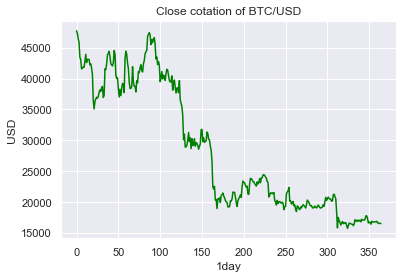

In [6]:
visualize_data(data, symbol, interval)
finance_visualize(data, symbol, interval)

### The Next step is to enrich the Database by adding indicators
- Indicators used are The Relative Strength Index (RSI), The Exponential Moving Average (EMA) and The Average True Range (ATR) 
    - The RSI measures the speed and change of price movements (momentum)
    - The EMA is a movig average that gives more weight to recent price, it seems to be relevent for predicting (trend)
    - The ATR quantifies the volatility (volaltility)

- Those indicators are computed over the 14 last days
  

In [7]:
final_data = add_indicators(data)
final_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,42581.64844,43462.78906,41766.66016,43090.78125,35.568008,43772.612563,2049.218750
1,2022-01-15,43089.08984,43809.28125,42579.42969,43087.21094,35.548190,43681.225680,1990.692522
2,2022-01-16,43098.19922,43492.07812,42610.44922,43099.76172,35.683860,43603.697152,1911.473692
3,2022-01-17,43104.35156,43199.91016,41568.76172,42216.80078,30.775756,43418.777635,1891.450460
4,2022-01-18,42218.01172,42682.64844,41288.87891,42369.82031,32.508293,43278.916659,1855.901822
...,...,...,...,...,...,...,...,...
347,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047,44.769321,16866.858029,369.682940
348,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039,42.154285,16823.063677,365.152714
349,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922,44.195619,16797.481750,351.276850
350,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977,43.673548,16771.418819,346.564273


### We can visualize the indicators 

#### EMA Indicator : 

In [8]:
indicator = 'EMA'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### RSI Indicator :

In [9]:
indicator = 'RSI'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### ATR Indicator : 

In [10]:
indicator = 'ATR'
visualize_with_indicator(final_data, symbol, interval, indicator)

# Prediction Model
#### First of all we have to scale the data for the models
- We recall that we want to predict the close price of Bitcoin

In [11]:
scaled_data = scaling_data(final_data)
scaled_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,0.846117,0.851405,0.834075,0.862553,0.390664,0.945616,0.742401
1,2022-01-15,0.862123,0.862250,0.859884,0.862440,0.390319,0.942433,0.717078
2,2022-01-16,0.862410,0.852322,0.860869,0.862836,0.392680,0.939733,0.682802
3,2022-01-17,0.862604,0.843177,0.827791,0.834970,0.307264,0.933293,0.674138
4,2022-01-18,0.834648,0.826986,0.818903,0.839800,0.337416,0.928423,0.658757
...,...,...,...,...,...,...,...,...
347,2022-12-27,0.036616,0.021966,0.035019,0.029610,0.550794,0.008590,0.015697
348,2022-12-28,0.029701,0.016013,0.030708,0.024574,0.505285,0.007065,0.013737
349,2022-12-29,0.024657,0.012236,0.031176,0.027503,0.540810,0.006174,0.007733
350,2022-12-30,0.027595,0.011758,0.027057,0.026582,0.531725,0.005266,0.005694


#### We can analyse de Covariance Matrix to see the correlation between variables
- It seems that the close price is not too rorrelated with the RSI Indicator

<function matplotlib.pyplot.show(close=None, block=None)>

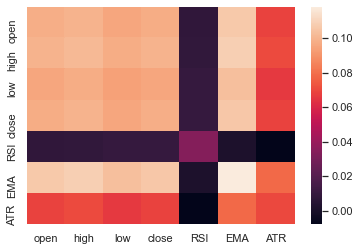

In [12]:
cov_matrix = scaled_data.drop('datetime', axis=1).cov()
sns.heatmap(cov_matrix)
plt.show

#### First Type of Regression : Linear Regression

-We use linear regression to predict the last month out of the past close price of BTCn

In [13]:

def simple_lr_preprocess(scaled_data,regressor, prediction_time):

    target = scaled_data['close'].shift(-prediction_time).dropna()
    target = np.array(target).reshape(-1, 1)

    price = np.array(scaled_data[regressor])[:-prediction_time]
    
    return price, target 



prediction_time = 60
regressor = ['close']
price, target  = simple_lr_preprocess(scaled_data, regressor, prediction_time)

In [14]:
price

array([[0.86255267],
       [0.86243999],
       [0.86283609],
       [0.83497033],
       [0.83979954],
       [0.81776562],
       [0.78707183],
       [0.65355106],
       [0.60964817],
       [0.64782154],
       [0.66101586],
       [0.66969939],
       [0.6647257 ],
       [0.67334957],
       [0.69464184],
       [0.70729434],
       [0.69916175],
       [0.71846516],
       [0.72477101],
       [0.66801035],
       [0.6792841 ],
       [0.81475526],
       [0.81083807],
       [0.84160089],
       [0.88639078],
       [0.89331968],
       [0.90431211],
       [0.87647446],
       [0.84034172],
       [0.83535348],
       [0.82959795],
       [0.84645735],
       [0.90780695],
       [0.88772984],
       [0.78256931],
       [0.76553472],
       [0.76868919],
       [0.71382678],
       [0.67125727],
       [0.70995631],
       [0.67788537],
       [0.71358787],
       [0.74027336],
       [0.7368441 ],
       [0.69305721],
       [0.86706752],
       [0.90499348],
       [0.889

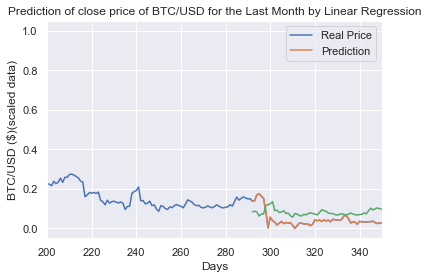

In [60]:
def apply_linear_regression(scaled_data, prediction_time, price, target, regressor):

    price_train, price_test, target_train, target_test = train_test_split(price, target, test_size = 0.7)
    lr = LinearRegression().fit(price_train, target_train)

    price_to_predict = price[-prediction_time:] 
    lr_prediction = lr.predict(price_to_predict)


    prediction_matrix = pd.DataFrame(scaled_data['close'].tail(prediction_time))
    prediction_matrix['prediction'] = lr_prediction

    price_to_future = np.array(scaled_data[regressor])[-prediction_time:].reshape(-1, 1)
    future = lr.predict(price_to_future)

    target_predict = lr.predict(price_test)
    r2 = r2_score(target_test, target_predict)

    return prediction_matrix, future, r2 

mat, ft, r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

visualize_linear_reg(mat, scaled_data, zoom = [200, 350])


def visualize_future(scaled_data, future):

    plt.xlabel('Days')
    plt.ylabel('BTC/USD ($)(scaled data)')
    arr1 = np.array(scaled_data['close']).reshape(-1, 1)
    arr2 = np.array(future).reshape(-1, 1) 
    ct = np.concatenate((arr1, arr2))
    plt.plot(ct)
    plt.axvline(x = arr1.shape[0], color = 'r', linestyle = '--', label = 'Prediction')

    plt.show




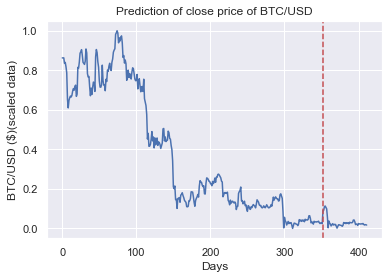

In [67]:
def visualize_future(scaled_data, future, zoom = None):

    plt.xlabel('Days')
    plt.ylabel('BTC/USD ($)(scaled data)')
    arr1 = np.array(scaled_data['close']).reshape(-1, 1)
    arr2 = np.array(future).reshape(-1, 1) 
    ct = np.concatenate((arr1, arr2))
    plt.plot(ct)
    if zoom is not None : 
        plt.xlim(zoom[0], zoom[1])
    plt.axvline(x = arr1.shape[0], color = 'r', linestyle = '--', label = 'Prediction')
    plt.title('Prediction of close price of BTC/USD')

    plt.show

visualize_future(scaled_data, ft)

In [57]:
scaled_data.isna().sum() 

datetime       0
open           0
high           0
low            0
close          0
RSI            0
EMA            0
ATR            0
prediction    60
dtype: int64

In [58]:
scaled_data

,datetime,open,high,low,close,RSI,EMA,ATR,prediction
0,2022-01-14,0.846117,0.851405,0.834075,0.862553,0.390664,0.945616,0.742401,0.743175
1,2022-01-15,0.862123,0.862250,0.859884,0.862440,0.390319,0.942433,0.717078,0.800636
2,2022-01-16,0.862410,0.852322,0.860869,0.862836,0.392680,0.939733,0.682802,0.794878
3,2022-01-17,0.862604,0.843177,0.827791,0.834970,0.307264,0.933293,0.674138,0.820862
4,2022-01-18,0.834648,0.826986,0.818903,0.839800,0.337416,0.928423,0.658757,0.835519
...,...,...,...,...,...,...,...,...,...
347,2022-12-27,0.036616,0.021966,0.035019,0.029610,0.550794,0.008590,0.015697,NaN
348,2022-12-28,0.029701,0.016013,0.030708,0.024574,0.505285,0.007065,0.013737,NaN
349,2022-12-29,0.024657,0.012236,0.031176,0.027503,0.540810,0.006174,0.007733,NaN
350,2022-12-30,0.027595,0.011758,0.027057,0.026582,0.531725,0.005266,0.005694,NaN



#### We need to take the past close price to train the model (feature of the model)

In [59]:
price = past_close_price(scaled_data,prediction_time)
price[:10]

array([[0.86255267],
       [0.86243999],
       [0.86283609],
       [0.83497033],
       [0.83979954],
       [0.81776562],
       [0.78707183],
       [0.65355106],
       [0.60964817],
       [0.64782154]])

#### To train the model we need target data which is the prediction column


In [60]:
target = target_data(scaled_data,prediction_time)
target[:10]

array([[0.74317461],
       [0.80063648],
       [0.79487848],
       [0.82086226],
       [0.83551879],
       [0.80546692],
       [0.79886656],
       [0.8400223 ],
       [0.85698465],
       [0.89152869]])


#### Split the data into 70% for training and 30% for testing the model


price_train, price_test, target_train, target_test = train_test_split(price, target, test_size = 0.7)

In [61]:
price_train, price_test, target_train, target_test = train_test_split(price, target, test_size = 0.7)
lr = LinearRegression().fit(price_train, target_train)


#### The prediction of future price with the Linear Regression
- We take the last rows of price to predict the future close price


In [62]:
price_future = price[-prediction_time:] 
price_future[:10]

array([[0.12862751],
       [0.1340055 ],
       [0.12730263],
       [0.09551123],
       [0.1111016 ],
       [0.11246525],
       [0.17705734],
       [0.18608433],
       [0.19226302],
       [0.20940547]])


#### Now we can visualize the prediction of the last month


In [63]:
lr_prediction = lr.predict(price_future)
print(lr_prediction[:10])

[[0.07916407]
 [0.08238125]
 [0.07837151]
 [0.05935348]
 [0.06867984]
 [0.06949559]
 [0.10813542]
 [0.11353548]
 [0.11723165]
 [0.12748649]]


In [65]:
model = pd.DataFrame(scaled_data['close'].tail(prediction_time))
model['prediction'] = lr_prediction

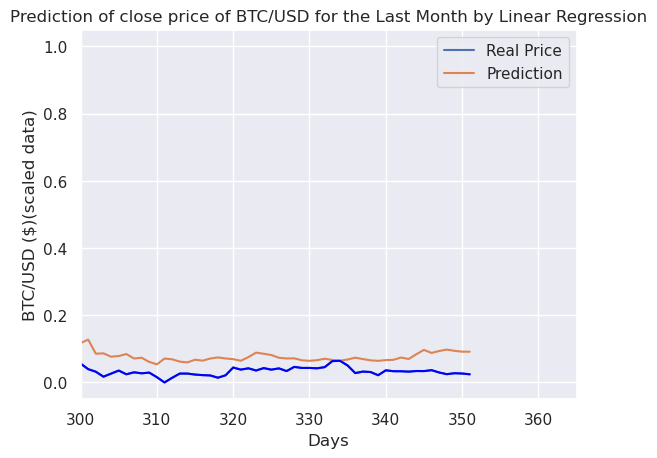

In [66]:
visualize_linear_reg(model,scaled_data)

In [67]:
target_predict = lr.predict(price_test)
r2 = r2_score(target_test, target_predict)
r2

0.5398723411291112